<a href="https://colab.research.google.com/github/mateuspadua/MachineLearningIGTI/blob/master/desafio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sns
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [ ]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="comp_bikes_mod.csv"
bikes = pd.read_csv(nome_do_arquivo)

In [ ]:
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17376,17377.0,NaN,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [ ]:
bikes.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [ ]:
bikes.shape

(17379, 17)

In [ ]:
bikes["temp"].isnull().sum() / len(bikes["temp"].index)

0.10000575407100523

In [ ]:
bikes.shape

(17379, 17)

In [ ]:
bikes2 = bikes.dropna(how='all', subset=["dteday"])

In [ ]:
bikes2

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [ ]:
bikes2["temp"].describe()

count    14066.000000
mean         0.496926
std          0.192971
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

In [ ]:
bikes2["windspeed"].describe()

count    14082.000000
mean         0.189552
std          0.122309
min          0.000000
25%          0.104500
50%          0.164200
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

In [ ]:
bikes2.season.value_counts()
bikes2.season.unique()

array([ 1., nan,  2.,  3.,  4.])

In [ ]:
bikes2

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [ ]:
bikes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [ ]:
bikes2["dteday"] = pd.to_datetime(bikes2['dteday']) # converte para datetime

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bikes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  float64       
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [ ]:
bikes2.sort_values(by=['dteday'], ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0
17366,17367.0,2012-12-31,1.0,1.0,12.0,11.0,0.0,1.0,1.0,2.0,NaN,NaN,0.60,NaN,43.0,114.0,157.0
17355,17356.0,2012-12-31,1.0,1.0,12.0,0.0,0.0,1.0,1.0,1.0,0.18,0.1818,0.55,0.1940,4.0,30.0,34.0
17356,17357.0,2012-12-31,1.0,NaN,12.0,1.0,0.0,1.0,1.0,1.0,0.18,0.1818,0.55,0.1940,6.0,13.0,19.0
17357,17358.0,2012-12-31,1.0,NaN,12.0,2.0,0.0,NaN,1.0,1.0,0.16,0.1667,0.59,0.1642,3.0,8.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,21.0,2011-01-01,1.0,0.0,1.0,20.0,0.0,6.0,0.0,2.0,0.40,0.4091,0.87,0.2537,11.0,25.0,36.0
21,22.0,2011-01-01,1.0,0.0,1.0,21.0,0.0,6.0,0.0,2.0,0.40,NaN,0.87,0.1940,NaN,31.0,34.0
22,23.0,2011-01-01,1.0,0.0,NaN,22.0,0.0,6.0,0.0,2.0,NaN,0.4091,0.94,0.2239,11.0,17.0,28.0
23,24.0,2011-01-01,1.0,0.0,1.0,23.0,0.0,NaN,0.0,2.0,0.46,0.4545,0.88,0.2985,15.0,24.0,NaN


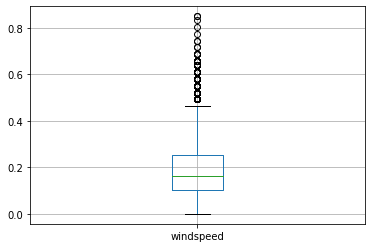

In [ ]:
bikes.boxplot("windspeed")

In [ ]:
bikes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [ ]:
bikes2.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.407970,0.866207,0.488959,-0.008643,0.014597,-0.001126,-0.010626,-0.020270,0.141681,0.141808,0.007919,-0.072738,0.167456,0.288272,0.282132
season,0.407970,1.000000,-0.005610,0.830177,-0.004903,-0.006846,0.005788,0.011555,-0.013153,0.311273,0.319559,0.146984,-0.149802,0.123779,0.173305,0.179190
yr,0.866207,-0.005610,1.000000,-0.010337,-0.006261,0.007763,-0.008526,-0.000958,-0.026142,0.040857,0.037290,-0.082335,-0.010422,0.141733,0.258888,0.252729
mnth,0.488959,0.830177,-0.010337,1.000000,-0.005681,0.021196,0.018991,-0.004235,0.002774,0.202203,0.210337,0.158109,-0.126643,0.074406,0.127226,0.129162
hr,-0.008643,-0.004903,-0.006261,-0.005681,1.000000,0.009332,-0.010738,-0.003002,-0.023388,0.142102,0.136946,-0.277403,0.140474,0.303261,0.371388,0.391391
holiday,0.014597,-0.006846,0.007763,0.021196,0.009332,1.000000,-0.099102,-0.250450,-0.018945,-0.031273,-0.037606,-0.008809,0.008267,0.014519,-0.050193,-0.036150
weekday,-0.001126,0.005788,-0.008526,0.018991,-0.010738,-0.099102,1.000000,0.038821,0.004393,-0.004478,-0.011512,-0.035510,0.011014,0.025301,0.020142,0.021396
workingday,-0.010626,0.011555,-0.000958,-0.004235,-0.003002,-0.250450,0.038821,1.000000,0.050468,0.053113,0.055287,0.017469,-0.010926,-0.300811,0.130360,0.028170
weathersit,-0.020270,-0.013153,-0.026142,0.002774,-0.023388,-0.018945,0.004393,0.050468,1.000000,-0.101245,-0.105254,0.418574,0.025729,-0.152335,-0.118396,-0.141622
temp,0.141681,0.311273,0.040857,0.202203,0.142102,-0.031273,-0.004478,0.053113,-0.101245,1.000000,0.988102,-0.069887,-0.016022,0.458735,0.329653,0.405867


In [ ]:
type(bikes2)

pandas.core.frame.DataFrame

In [ ]:
# matriz de correlação
corr = bikes2.corr().loc[["season", "temp", "atemp", "hum", "windspeed", "cnt"], ["season", "temp", "atemp", "hum", "windspeed", "cnt"]]
corr

,season,temp,atemp,hum,windspeed,cnt
season,1.000000,0.311273,0.319559,0.146984,-0.149802,0.179190
temp,0.311273,1.000000,0.988102,-0.069887,-0.016022,0.405867
atemp,0.319559,0.988102,1.000000,-0.054224,-0.058803,0.403810
hum,0.146984,-0.069887,-0.054224,1.000000,-0.289859,-0.323409
windspeed,-0.149802,-0.016022,-0.058803,-0.289859,1.000000,0.091747
cnt,0.179190,0.405867,0.403810,-0.323409,0.091747,1.000000


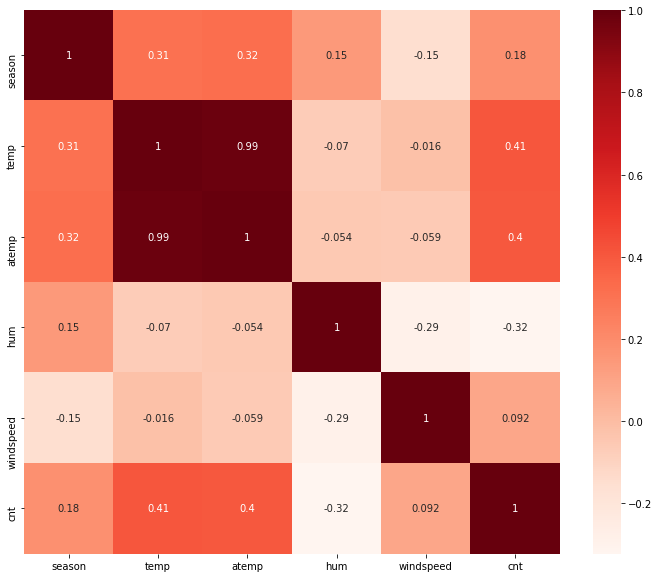

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
def fill_na_with_mean(df, attribute):
    df[attribute].fillna((df[attribute].mean()), inplace=True)

fill_na_with_mean(bikes2, 'hum')
fill_na_with_mean(bikes2, 'cnt')
fill_na_with_mean(bikes2, 'casual')
# bikes2["hum"].isna().sum()
bikes2["casual"].isna().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [ ]:
bikes2["hum"].isna().sum()

0

[16.]
[[1 1]
 [0 2]
 [2 4]
 [2 3]]
[1 0 2 2]


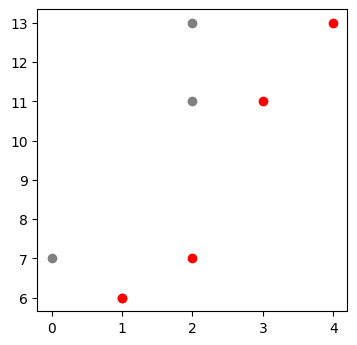

In [ ]:
x = np.array([[1, 1], [0, 2], [2, 4], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(x, np.array([1, 2])) + 3
reg = LinearRegression().fit(x, y)
reg.score(x, y)

reg.coef_

reg.intercept_

previsao = reg.predict(np.array([[3, 5]]))

# plt.figure(figsize=(4, 4), dpi=100)
# plt.scatter(x, y,  color='gray') #realiza o plot do gráfico de dispersão
# plt.plot(x, previsao, color='red', linewidth=2) # realiza o plto da "linha"
# plt.xlabel("Peso Declarado")
# plt.ylabel("Peso Real")
# plt.show()

print(previsao)
print(x)
print(x[:,0])

plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x[:,0], y,  color='gray') #realiza o plot do gráfico de dispersão
plt.scatter(x[:,1], y,  color='red') #realiza o plot do gráfico de dispersão
# plt.plot(x[:,0], previsao, color='green', linewidth=2) # realiza o plto da "linha"

# ax1 = pd.DataFrame(x[:,0]).plot(kind='scatter', color='blue', alpha=0.5, figsize=(10, 7))
# df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
# plt.legend(labels=['Males', 'Females'])
# plt.title('Relationship between Height and Weight', size=24)
# plt.xlabel('Height (inches)', size=18)
# plt.ylabel('Weight (pounds)', size=18);

In [ ]:
bikes2

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.000000,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.000000,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.000000,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.000000,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.000000,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.000000,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,35.416317,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.000000,48.0,61.0


In [ ]:
x = bikes2[['hum', 'casual']].values
y = bikes2['cnt'].values

In [ ]:
reg = LinearRegression().fit(x, y)
reg.score(x, y)
previsao=reg.predict(x)

from sklearn.metrics import r2_score 
R_2 = r2_score(y, previsao)
R_2
# reg.coef_

0.4059859251122173

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17376,17377.0,NaN,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=1)
fitDtr = dtr.fit(x, y)
previsao = dtr.predict(x)
# dtr.score(x, y)
R_2 = r2_score(y, previsao)
R_2

0.7098339715834964

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import preprocessing
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
lab_enc = preprocessing.LabelEncoder()
lab_enc
encoded = lab_enc.fit_transform(x)
# clf = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf', gamma='scale', random_state=42))
# clf.fit(X, y)

ValueError: ignored